In [41]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from category_encoders import MEstimateEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [ ]:

def make_mi_scores(X, y):
    X = X.copy()
    # All discrete features should now have integer dtypes
    mi_scores = mutual_info_regression(X, y, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [6]:
# Load data
train_data_path = "train.csv"
df_train = pd.read_csv(train_data_path)


In [137]:
df_smaller = df_train.sample(random_state=1, n=10000, axis=0)
X_train, X_test, y_train, y_test = train_test_split(df_smaller.loc[:,"f0":"f284"], df_smaller["target"], test_size=0.2, random_state=42)

In [99]:
mi_scores = make_mi_scores(X_train, y_train)
print(mi_scores)

f22     0.136144
f275    0.017193
f248    0.015890
f69     0.014080
f270    0.012961
          ...   
f153    0.000000
f152    0.000000
f149    0.000000
f143    0.000000
f0      0.000000
Name: MI Scores, Length: 285, dtype: float64


In [138]:
X_train = X_train.loc[:, mi_scores > 0]

In [33]:
print(X_train)

              f4        f8        f9       f10       f11       f12       f14  \
200344  0.738977  0.343954  0.304513  0.261342  0.104077  0.267233  0.259127   
312215  0.464756  0.444405  0.239813  0.140892  0.104887  0.239723  0.324069   
533016  0.636656  0.372685  0.287132  0.155046  0.101121  0.333760  0.287776   
10263   0.533226  0.333718  0.278033  0.031300  0.102901  0.301678  0.315499   
545224  0.519494  0.471517  0.235424  0.277213  0.413598  0.503704  0.254183   
...          ...       ...       ...       ...       ...       ...       ...   
652252  0.577359  0.524364  0.211108  0.153843  0.101787  0.255596  0.268324   
111307  0.725698  0.580798  0.174136  0.158053  0.106494  0.256802  0.401425   
44375   0.660706  0.556100  0.283829  0.272994  0.172650  0.374269  0.370364   
964406  0.570197  0.570902  0.293621  0.269089  0.111850  0.282940  0.275374   
499475  0.557894  0.645830  0.329279  0.145277  0.105488  0.279547  0.321839   

             f18       f21  f22  ...  f

In [157]:
xgb_params = dict(
    #objective = "binary",
    eval_metric = roc_auc_score,
    max_depth=2,           # maximum depth of each tree - try 2 to 10
    learning_rate=0.01,    # effect of each tree - try 0.0001 to 0.1
    n_estimators=1000,     # number of trees (that is, boosting rounds) - try 1000 to 8000
    min_child_weight=2,    # minimum number of houses in a leaf - try 1 to 10
    colsample_bytree=0.2,  # fraction of features (columns) per tree - try 0.2 to 1.0
    subsample=0.7,         # fraction of instances (rows) per tree - try 0.2 to 1.0
    reg_alpha=3,         # L1 regularization (like LASSO) - try 0.0 to 10.0
    reg_lambda=2.0,        # L2 regularization (like Ridge) - try 0.0 to 10.0
    num_parallel_tree=1,   # set > 1 for boosted random forests
)

model = XGBRegressor(**xgb_params)
model.fit(X_train, y_train)
# X_test = df_test.loc[:,"f0":"f284"]
# print(X_test.loc[:100, mi_scores > 0.0])
predictions = model.predict(X_test.loc[:,mi_scores > 0])
roc_auc_score(y_test, predictions)

0.8360240962649589

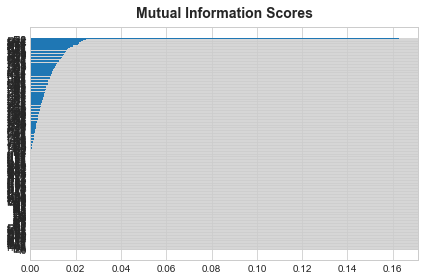

In [21]:
plot_mi_scores(mi_scores)

In [ ]:
def corrplot(df, method="pearson", annot=True, **kwargs):
    sns.clustermap(
        df.corr(method),
        vmin=-1.0,
        vmax=1.0,
        cmap="icefire",
        method="complete",
        annot=annot,
        **kwargs,
    )


corrplot(X_train, annot=None)

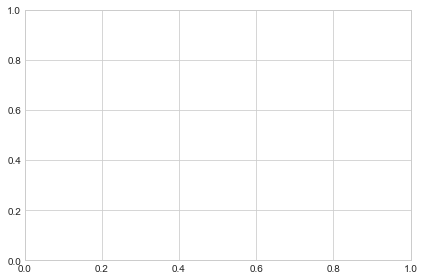

In [159]:
for column in X_train.columns:
    if X_train[column].dtype == "float64":
        plt.clf()
        plt.cla()
        this, that, obj = plt.hist(X_train[column], bins=30)
        plt.savefig("pics/" + column)
plt.clf()
plt.cla()
        #this.clear()
        #that.clear()
        #obj.clear()

        # ax.set_title(column)
        # fig.savefig(column)

In [162]:
features_for_kmeans2 = [
    "f33",
    "f50",
    "f72", 
    "f75",
    "f78",
    "f90",
    "f92",
    "f95", 
    "f102",
    "f108",
    "f110",
    "f114",
    "f116",
    "f117",
    "f118",
    "f124",
    "f135",
    "f138",
    "f139",
    "f140",
    "f141",
    "f142",
    "f146",
    "f150",
    "f151",
    "f155",
    "f156",
    "f157",
    "f158",
    "f160",
    "f162",
    "f165",
    "f166",
    "f167",
    "f168",
    "f170",
    "f171",
    "f172",
    "f174",
    "f179",
    "f182",
    "f184",
    "f230",
    "f203",
    "f234",
    "f237",
    "f224",
    "f225",
]
features_for_kmeans3 = [
    "f58", # 3
    "f93", # 3x split?
    "f94", # 3
    "f214",
    "f192"
    "f207",
    "f219",
    "f217",
]
features_for_kmeans4 = [
    "f239"
]
features_for_gmm = [
    "f8",
    "f50",
    "f145",
    "f147",
    "f148",
]
features_to_log = [
    "f2",
    "f9",
    "f18",
    "f29",
    "f31",
    "f32",
    "f37",
    "f42",
    "f47",
    "f50",
    "f53",
    "f55",
    "f58",
    "f63",
    "f64",
    "f69",
    "f71",
    "f87", 
    "f109",
    "f112",
    "f118",
    "f123",
    "f128",
    "f175",
    "f176",
    "f183",
    "f185",
    "f200",
    "f202",
    "f211",
    "f212",
    "f231",
    "f236",
    "f238",
    "f240",
]
features_to_exp = [
    "f81"
]

In [167]:
df_transform = df_train.sample(random_state=1, n=2000, axis=0)
df_transform2 = df_transform.loc[:,"f0":"f284"]
Xx_train, Xx_test, yy_train, yy_test = train_test_split(df_transform2.loc[:,mi_scores > 0], df_transform["target"], test_size=0.2, random_state=42)

In [168]:
Xx_train.head()

,f1,f2,f5,f8,f9,f10,f13,f17,f18,f22,...,f266,f267,f270,f272,f275,f276,f278,f279,f283,f284
292050,0.429169,0.244299,0.464874,0.248173,0.295840,0.137555,0.612824,0.230591,0.204600,1,...,0,0,0,1,0,0,1,0,1,1
392262,0.365982,0.180547,0.501674,0.336079,0.299989,0.141190,0.591824,0.196154,0.262367,0,...,0,0,1,0,1,0,0,0,0,0
27514,0.390152,0.085478,0.311630,0.630541,0.214214,0.030295,0.656431,0.231355,0.196863,1,...,0,0,1,0,1,0,0,0,1,0
463279,0.470863,0.096490,0.288431,0.483414,0.232590,0.143113,0.534604,0.360384,0.247971,1,...,0,1,0,0,1,0,0,0,0,0
854979,0.562661,0.267753,0.455771,0.389749,0.321958,0.267006,0.639047,0.255403,0.221199,1,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
this, that, obj = plt.hist(X_train["f33"], bins=30)